# Regression Outputs

In [110]:
from IPython.display import HTML, display
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

## Model 1: characteristics only

### HK Cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_38404/3528737044.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')


                            OLS Regression Results                            
Dep. Variable:           House prices   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     9410.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        16:11:27   Log-Likelihood:            -1.4642e+06
No. Observations:              105944   AIC:                         2.929e+06
Df Residuals:                  105934   BIC:                         2.929e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.502e+06   1

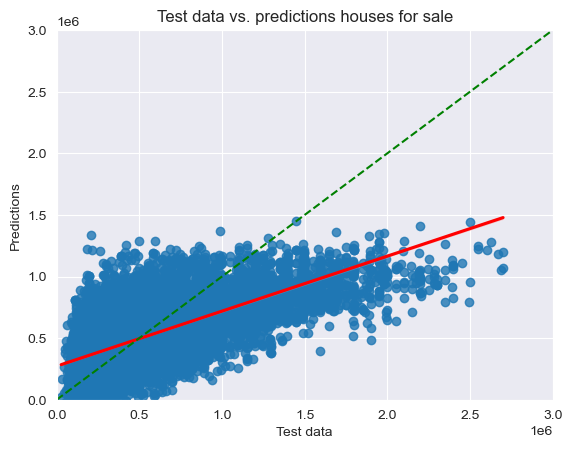

In [114]:
hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')
df_hk_characteristics = pd.DataFrame(hk_characteristics)

X = df_hk_characteristics[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer','keller', 'parkplatz', 'age', 'objektzustand']]
Y = df_hk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(0, 3000000)
ax.set_ylim(0, 3000000)
ax.plot([0, 3000000], [0, 3000000], color='g', ls='--')

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(hk_ls.summary(xname=['Intercept', 'Log Living space', 'Log Land area', 'Number of rooms', 'Number of bedrooms', 'Number of bathrooms', 'Cellar', 'Parking space', 'Age', 'Object condition'], yname='House prices'))

### WK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_38404/3862551457.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')


                            OLS Regression Results                            
Dep. Variable:       Apartment prices   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 3.825e+04
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        16:19:55   Log-Likelihood:            -4.5279e+06
No. Observations:              334231   AIC:                         9.056e+06
Df Residuals:                  334223   BIC:                         9.056e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.354e+06   5

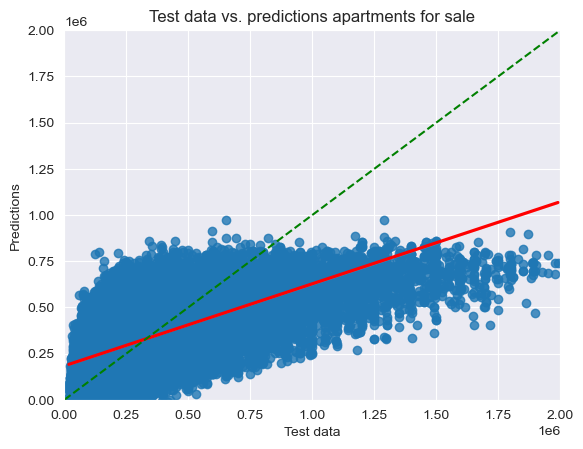

In [115]:
wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')
df_wk_characteristics = pd.DataFrame(wk_characteristics)

X = df_wk_characteristics[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand']]
Y = df_wk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(0, 2000000)
ax.set_ylim(0, 2000000)
ax.plot([0, 2000000], [0, 2000000], color='g', ls='--')

X_train_Sm= sm.add_constant(X_train)
wk_ls = sm.OLS(y_train,X_train_Sm).fit()
print(wk_ls.summary(xname=['Intercept', 'Log Living space', 'Number of rooms', 'Number of bedrooms', 'Number of bathrooms', 'Elevator', 'Age', 'Object condition'], yname='Apartment prices'))

In [100]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
#stargazer_tab.title('Model 1')
stargazer_tab.covariate_order(['const', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Log Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parking space', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Log Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-1.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 2: macroeconomic factors only

### HK cities dataset

                            OLS Regression Results                            
Dep. Variable:           House prices   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1079.
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.30e-114
Time:                        16:24:52   Log-Likelihood:                -1778.5
No. Observations:                 153   AIC:                             3569.
Df Residuals:                     147   BIC:                             3587.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

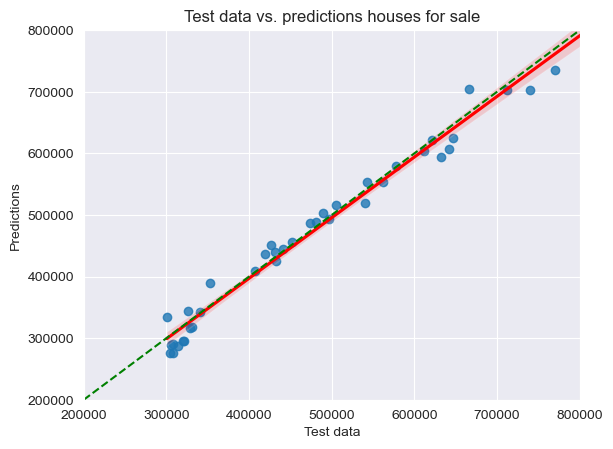

In [117]:
hk_macro_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_macro_factors_cleaned.csv')
df_hk_macro_factors = pd.DataFrame(hk_macro_factors)

X = df_hk_macro_factors[['interest_rate', 'Erwerbslosenquote', 'housing_construction_investment', 'disposable_income', 'BIP_pro_kopf']]
Y = df_hk_macro_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(200000, 800000)
ax.set_ylim(200000, 800000)
ax.plot([200000, 800000], [200000, 800000], color='g', ls='--')

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm, missing='raise').fit()
print(hk_ls.summary(xname=['Intercept', 'Interest rate', 'Unemployment rate', 'Investment in housing construction', 'Log Disposable income', 'Log GDP per capita'], yname='House prices'))

### WK cities dataset

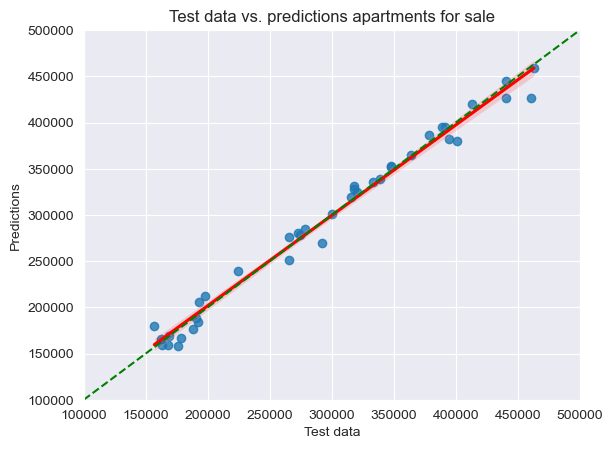

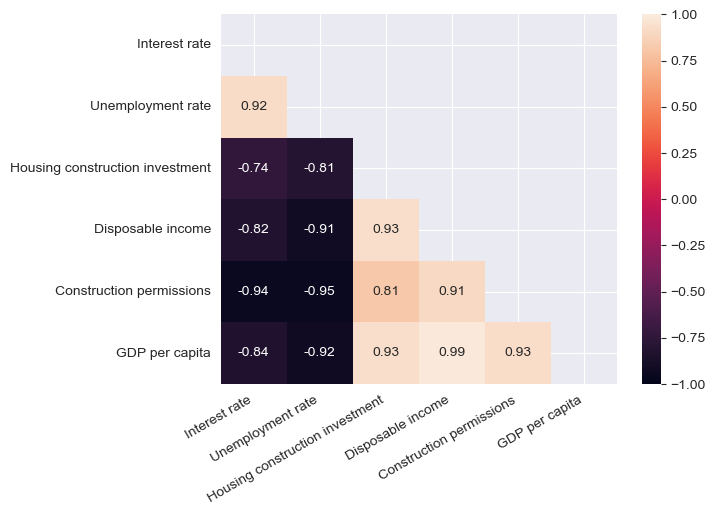

                            OLS Regression Results                            
Dep. Variable:       Apartment prices   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1387.
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.03e-126
Time:                        16:25:58   Log-Likelihood:                -1668.8
No. Observations:                 153   AIC:                             3352.
Df Residuals:                     146   BIC:                             3373.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [119]:
wk_macro_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_macro_factors_cleaned.csv')
df_wk_macro_factors = pd.DataFrame(wk_macro_factors)

X = df_wk_macro_factors[['interest_rate', 'Erwerbslosenquote', 'housing_construction_investment', 'disposable_income', 'Baugenehmigungen', 'BIP_pro_kopf']]
Y = df_wk_macro_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(100000, 500000)
ax.set_ylim(100000, 500000)
ax.plot([100000, 500000], [100000, 500000], color='g', ls='--')
plt.show()

mask = np.triu(np.ones_like(X.corr(), dtype=bool))
x_axis_labels = ['Interest rate', 'Unemployment rate', 'Housing construction investment', 'Disposable income', 'Construction permissions', 'GDP per capita']
y_axis_labels = ['Interest rate', 'Unemployment rate', 'Housing construction investment', 'Disposable income', 'Construction permissions', 'GDP per capita']
sns.heatmap(X.corr(), annot=True,  mask=mask, xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmin=-1, vmax=1)
plt.xticks(rotation=30, ha='right')
plt.show()


X_train_Sm= sm.add_constant(X_train)
wk_ls=sm.OLS(y_train,X_train_Sm, missing='raise').fit()
print(wk_ls.summary(xname=['Intercept', 'Interest rate', 'Unemployment rate', 'Investment in housing construction', 'Log Disposable income', 'Construction permissions', 'Log GDP per capita'], yname='Apartment prices'))

In [103]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployment rate', 
    'const': 'Intercept', 
    'disposable_income': 'Log Disposable income',
    'housing_construction_investment': 'Investment in housing construction', 
    'Baugenehmigungen': 'Log Number of construction permissions', 
    'BIP_pro_kopf': 'Log GDP per capita'
    })
open('./Regression-Output/model-2.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 3: characteristics and macroeconomic factors combines

### HK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_38404/1788352056.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_both_factors_cleaned.csv')


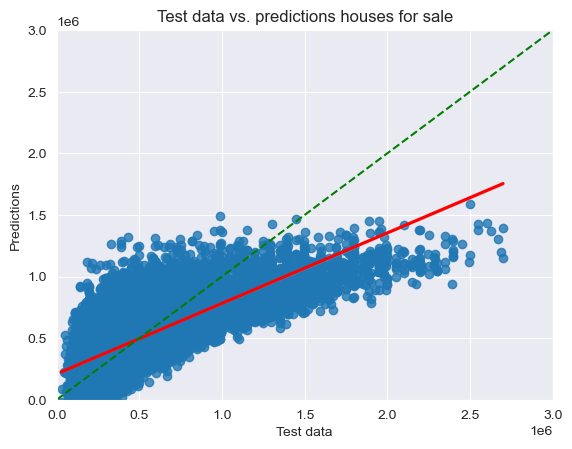

                            OLS Regression Results                            
Dep. Variable:           House prices   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 1.001e+04
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        16:31:32   Log-Likelihood:            -1.4507e+06
No. Observations:              105944   AIC:                         2.901e+06
Df Residuals:                  105929   BIC:                         2.902e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [122]:
hk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_both_factors_cleaned.csv')
df_hk_both_factors = pd.DataFrame(hk_both_factors)

X = df_hk_both_factors[['interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'BIP_pro_kopf', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age','objektzustand']]
Y = df_hk_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(0, 3000000)
ax.set_ylim(0, 3000000)
ax.plot([0, 3000000], [0, 3000000], color='g', ls='--')
plt.show()

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(hk_ls.summary(xname=['Intercept', 'Interest rate', 'Unemployment rate', 'Investment in housing construction', 'Log Disposable income', 'Log GDP per capita','Log Living space', 'Log Land area', 'Number of rooms', 'Number of bedrooms', 'Number of bathrooms', 'Cellar', 'Parking space', 'Age', 'Object condition'], yname='House prices'))

### WK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_38404/2670372826.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_both_factors_cleaned.csv')


                            OLS Regression Results                            
Dep. Variable:       Apartment prices   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 4.058e+04
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        16:28:55   Log-Likelihood:            -4.4679e+06
No. Observations:              334231   AIC:                         8.936e+06
Df Residuals:                  334217   BIC:                         8.936e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

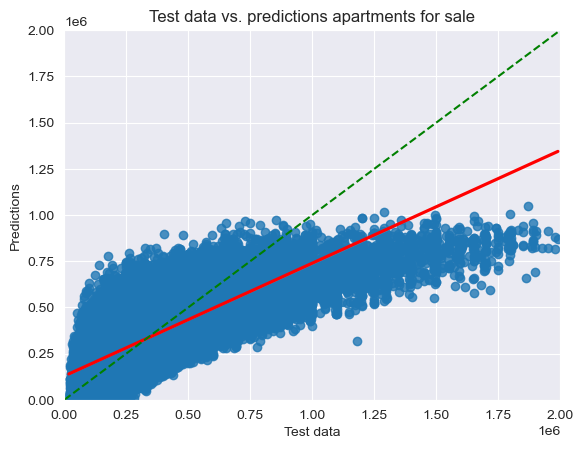

In [120]:
wk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_both_factors_cleaned.csv')
df_wk_both_factors = pd.DataFrame(wk_both_factors)

X = df_wk_both_factors[['interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer','badezimmer', 'aufzug', 'age', 'objektzustand']]
Y = df_wk_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(0, 2000000)
ax.set_ylim(0, 2000000)
ax.plot([0, 2000000], [0, 2000000], color='g', ls='--')

X_train_Sm= sm.add_constant(X_train)
wk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(wk_ls.summary(xname=['Intercept', 'Interest rate', 'Unemployment rate', 'Investment in housing construction', 'Log Disposable income', 'Construction permissions', 'Log GDP per capita', 'Log Living space', 'Number of rooms', 'Number of bedrooms', 'Number of bathrooms', 'Elevator', 'Age', 'Object condition'], yname='Apartment prices'))

In [106]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployment rate', 
    'const': 'Intercept', 
    'disposable_income': 'Log Disposable income',
    'housing_construction_investment': 'Investment in housing construction', 
    'Baugenehmigungen': 'Log Number of construction permissions', 
    'BIP_pro_kopf': 'Log GDP per capita',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Log Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parking space', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Log Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-3.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 4: cross-sectional dataset

### HK cities dataset

                            OLS Regression Results                            
Dep. Variable:           House prices   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     2684.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        16:36:14   Log-Likelihood:            -7.4457e+05
No. Observations:               53628   AIC:                         1.489e+06
Df Residuals:                   53613   BIC:                         1.489e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.551e+

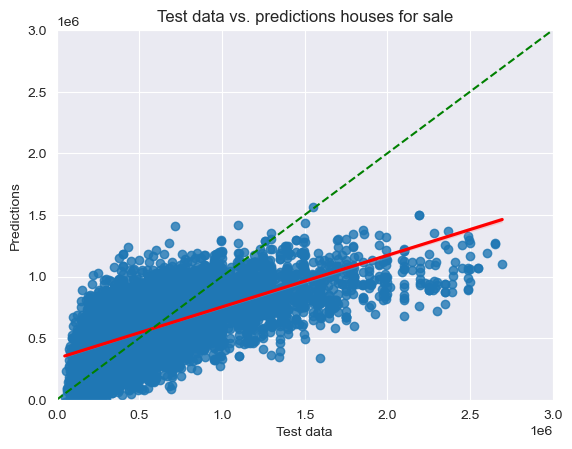

In [124]:
hk_2022 = pd.read_csv('./Data/Cleaned-Datasets/HK_2022_cleaned.csv')
df_hk_2022 = pd.DataFrame(hk_2022)

X = df_hk_2022[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age', 'objektzustand', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote']]
Y = df_hk_2022['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(0, 3000000)
ax.set_ylim(0, 3000000)
ax.plot([0, 3000000], [0, 3000000], color='g', ls='--')

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(hk_ls.summary(xname=['Intercept', 'Log Living space', 'Log Land area', 'Number of rooms', 'Number of bedrooms', 'Number of bathrooms', 'Cellar', 'Parking space', 'Age', 'Object condition', 'Population density', 'Unemployment rate', 'Log GDP per capita', 'Log Income per person', 'Vacancy rate'], yname='House prices'))

### WK cities dataset

                            OLS Regression Results                            
Dep. Variable:       Apartment prices   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     5394.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        16:39:33   Log-Likelihood:            -7.2181e+05
No. Observations:               53710   AIC:                         1.444e+06
Df Residuals:                   53697   BIC:                         1.444e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.287e+

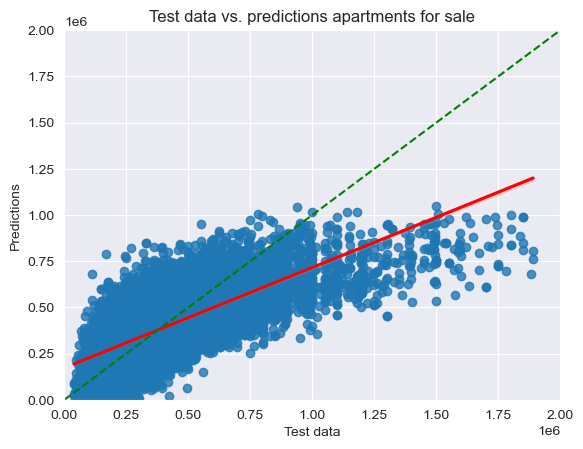

In [126]:
wk_2022 = pd.read_csv('./Data/Cleaned-Datasets/WK_2022_cleaned.csv')
df_wk_2022 = pd.DataFrame(wk_2022)

X = df_wk_2022[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote']]
Y = df_wk_2022['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

fig, ax = plt.subplots()
sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'}, ax=ax).set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
ax.set_xlim(0, 2000000)
ax.set_ylim(0, 2000000)
ax.plot([0, 2000000], [0, 2000000], color='g', ls='--')

X_train_Sm= sm.add_constant(X_train)
wk_ls = sm.OLS(y_train,X_train_Sm).fit()
print(wk_ls.summary(xname=['Intercept', 'Log Living space', 'Number of rooms', 'Number of bedrooms', 'Number of bathrooms', 'Elevator', 'Age', 'Object condition', 'Population density', 'Unemployment rate', 'Log GDP per capita', 'Log Income per person', 'Vacancy rate'], yname='Apartment prices'))

In [109]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'Bevölkerungsdichte': 'Population density', 
    'const': 'Intercept', 
    'Arbeitslosenquote': 'Unemployment rate',
    'BIP_pro_einwohner': 'Log GDP per capita', 
    'Einkommen': 'Log Income per person', 
    'Leerstandsquote': 'Vacancy rate',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Log Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parking space', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Log Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-4.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab